# Introduction

- This document reports basic analysis of the application records
- The purpose is to identity possible issues, preprocessing steps, and static features engineering

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('summary_application.csv')

In [3]:
df.describe(include='all')

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
count,4.385570e+05,438557,438557,438557,438557.000000,4.385570e+05,438557,438557,438557,438557,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,304354,438557.000000
unique,NaN,2,2,2,NaN,NaN,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN
freq,NaN,294440,275459,304074,NaN,NaN,226104,301821,299828,393831,NaN,NaN,NaN,NaN,NaN,NaN,78240,NaN
mean,6.022176e+06,NaN,NaN,NaN,0.427390,1.875243e+05,NaN,NaN,NaN,NaN,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,NaN,2.194465
std,5.716370e+05,NaN,NaN,NaN,0.724882,1.100869e+05,NaN,NaN,NaN,NaN,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,NaN,0.897207
min,5.008804e+06,NaN,NaN,NaN,0.000000,2.610000e+04,NaN,NaN,NaN,NaN,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000
25%,5.609375e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000
50%,6.047745e+06,NaN,NaN,NaN,0.000000,1.607805e+05,NaN,NaN,NaN,NaN,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000
75%,6.456971e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,NaN,3.000000


In [4]:
del df['FLAG_MOBIL'] # constant

# Missing value, outlier, and skewness

- missing values: `OCCUPATION_TYPE`, fill in with 'Unknown'
- outliers: it seems that `CNT_CHILDREN>3` are outliers, to be safe, remove records `CNT_CHILDREN>5`
- log transformation to fix right skewness: `AMT_INCOME_TOTAL`

In [5]:
df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

<AxesSubplot:>

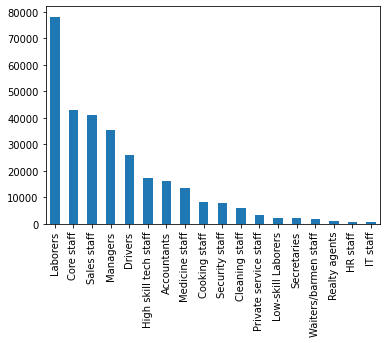

In [6]:
df['OCCUPATION_TYPE'].value_counts().plot.bar()

<AxesSubplot:ylabel='Frequency'>

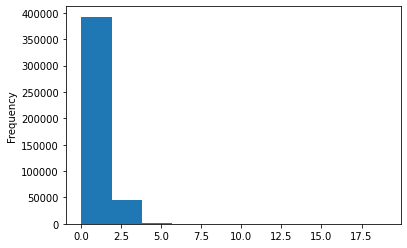

In [7]:
df['CNT_CHILDREN'].plot.hist()

<AxesSubplot:>

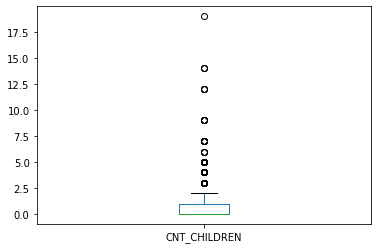

In [8]:
df['CNT_CHILDREN'].plot.box()

In [9]:
(df['CNT_CHILDREN']>5).value_counts()

False    438531
True         26
Name: CNT_CHILDREN, dtype: int64

In [10]:
df=df.query('CNT_CHILDREN<=5')

<AxesSubplot:ylabel='Frequency'>

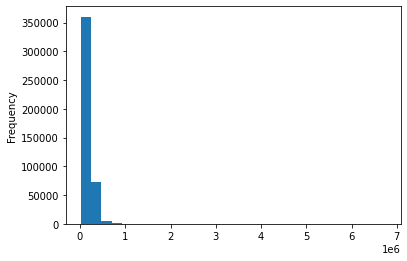

In [11]:
df['AMT_INCOME_TOTAL'].plot.hist(bins=30)

<AxesSubplot:ylabel='Frequency'>

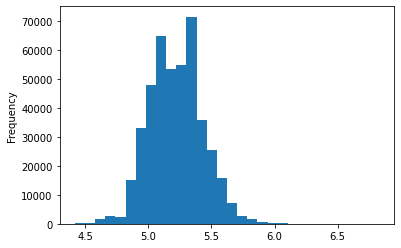

In [12]:
 df['AMT_INCOME_TOTAL'].map(np.log10).plot.hist(bins=30)

# Data integrity

- about 18% `DAYS_EMPLOYED` data has the same large value: 365243
- solution: replace the large values with `column mean` and add an `indicator column`
- in addition, apply `negative log` transformation

<AxesSubplot:ylabel='Frequency'>

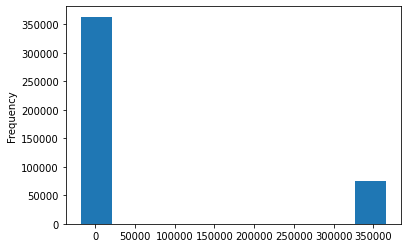

In [13]:
df['DAYS_EMPLOYED'].plot.hist()

In [14]:
df['DAYS_EMPLOYED'][df['DAYS_EMPLOYED']>=0].value_counts()

365243    75329
Name: DAYS_EMPLOYED, dtype: int64

<AxesSubplot:ylabel='Frequency'>

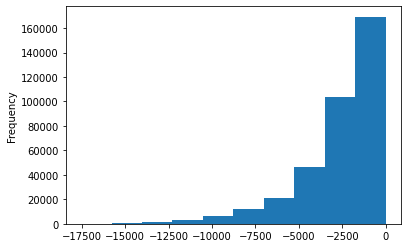

In [15]:
df['DAYS_EMPLOYED'][df['DAYS_EMPLOYED']<0].plot.hist()

<AxesSubplot:ylabel='Frequency'>

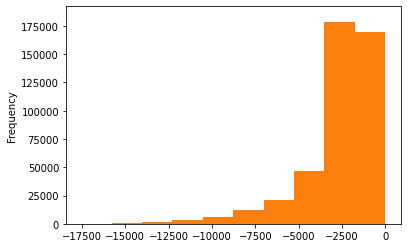

In [16]:
df['FLAG_EMPLOYED'] = df['DAYS_EMPLOYED']<0
df.loc[df['DAYS_EMPLOYED']>=0, 'DAYS_EMPLOYED'] = df.loc[df['DAYS_EMPLOYED']<0, 'DAYS_EMPLOYED'].mean()
df['DAYS_EMPLOYED'].map(lambda days: np.log(-days)).plot.hist()
df['DAYS_EMPLOYED'].plot.hist()

# More Analyses

- an interesting side observation: 60% male have cars, while only 25% female have cars
- certain groups, such as married people and aborers, are more likely to become potential clients

<AxesSubplot:>

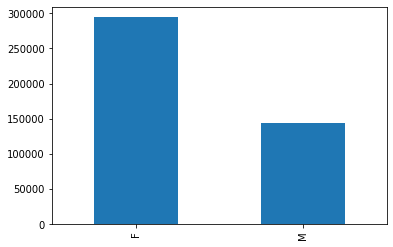

In [17]:
df['CODE_GENDER'].value_counts().plot.bar()

<AxesSubplot:>

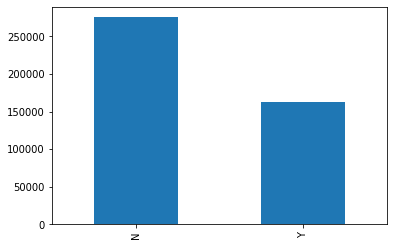

In [18]:
df['FLAG_OWN_CAR'].value_counts().plot.bar()

<AxesSubplot:xlabel='CODE_GENDER,FLAG_OWN_CAR'>

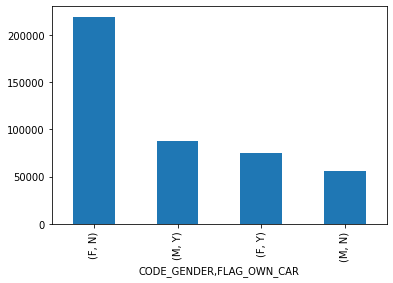

In [19]:
df[['CODE_GENDER', 'FLAG_OWN_CAR']].value_counts().plot.bar()

<AxesSubplot:>

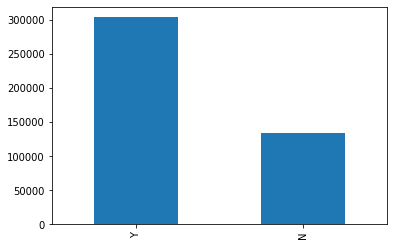

In [20]:
df['FLAG_OWN_REALTY'].value_counts().plot.bar()

<AxesSubplot:>

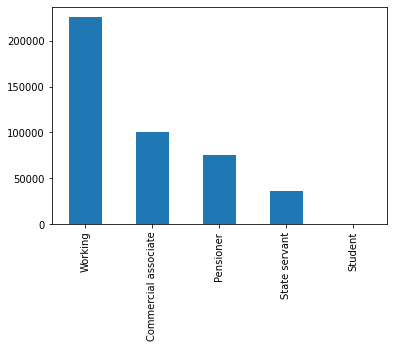

In [21]:
df['NAME_INCOME_TYPE'].value_counts().plot.bar()

<AxesSubplot:>

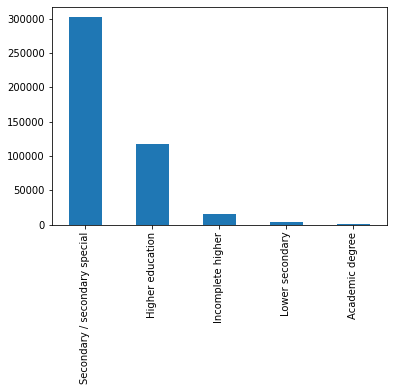

In [22]:
df['NAME_EDUCATION_TYPE'].value_counts().plot.bar()

<AxesSubplot:>

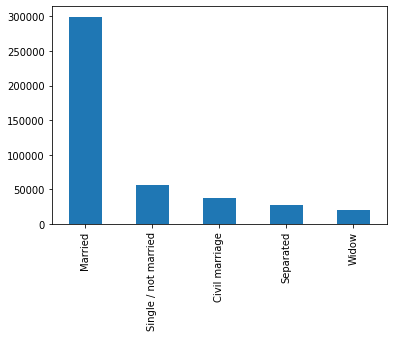

In [23]:
df['NAME_FAMILY_STATUS'].value_counts().plot.bar()

<AxesSubplot:>

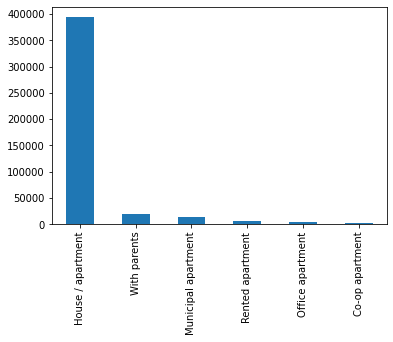

In [24]:
df['NAME_HOUSING_TYPE'].value_counts().plot.bar()

<AxesSubplot:>

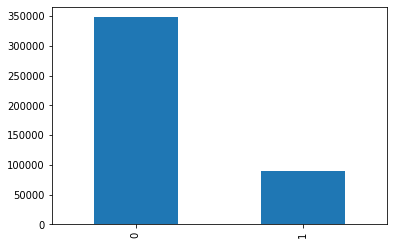

In [25]:
df['FLAG_WORK_PHONE'].value_counts().plot.bar()

<AxesSubplot:>

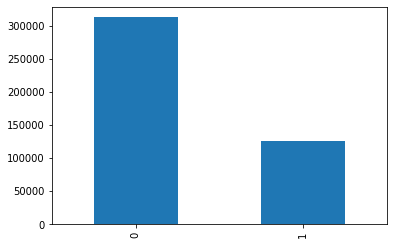

In [26]:
df['FLAG_PHONE'].value_counts().plot.bar()

<AxesSubplot:>

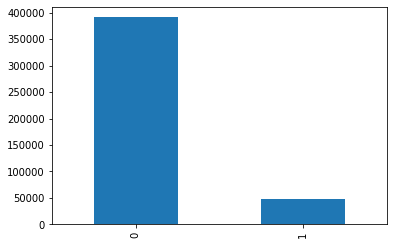

In [27]:
df['FLAG_EMAIL'].value_counts().plot.bar()

<AxesSubplot:>

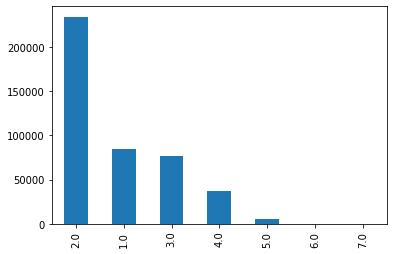

In [28]:
df['CNT_FAM_MEMBERS'].value_counts().plot.bar()

<AxesSubplot:>

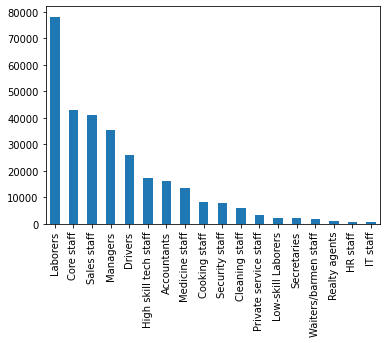

In [29]:
df['OCCUPATION_TYPE'].value_counts().plot.bar()

# Heatmap

- positive correlation: CNT_CHILDREN and CNT_FAM_MEMBERS

<AxesSubplot:>

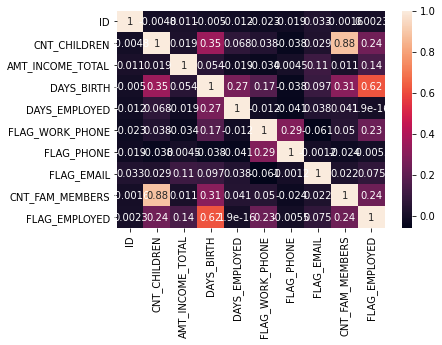

In [30]:
sns.heatmap(df.corr(), annot = True)

# API

- The function API.get_features() will be used for further analysis

In [31]:
import API
API.get_features()

data shape (438557, 17)
data shape after removing duplicates and setting ID (438463, 16)
data shape after removing outliers and adding indicators (438437, 17)


,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,FLAG_EMPLOYED
ID,,,,,,,,,,,,,,,,,
5008804,M,Y,Y,0,5.630936,Working,Higher education,Civil marriage,Rented apartment,-12005,8.421123,1,0,0,Unknown,2.0,True
5008805,M,Y,Y,0,5.630936,Working,Higher education,Civil marriage,Rented apartment,-12005,8.421123,1,0,0,Unknown,2.0,True
5008806,M,Y,Y,0,5.051153,Working,Secondary / secondary special,Married,House / apartment,-21474,7.033506,0,0,0,Security staff,2.0,True
5008808,F,N,Y,0,5.431364,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,8.023225,0,1,1,Sales staff,1.0,True
5008809,F,N,Y,0,5.431364,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,8.023225,0,1,1,Sales staff,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840104,M,N,Y,0,5.130334,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,7.872131,0,0,0,Unknown,1.0,False
6840222,F,N,N,0,5.014940,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,8.008698,0,0,0,Laborers,1.0,True
6841878,F,N,N,0,4.732394,Commercial associate,Higher education,Single / not married,With parents,-8169,5.918894,1,0,0,Sales staff,1.0,True
